<a href="https://colab.research.google.com/github/euviniciusmendonca/estudo_python/blob/main/Deliverable_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autor: Vinícius Rafael Lobo de Mendonça
## RID 38195
## Projeto: Walmart



**DESCRIÇÃO DOS DADOS**

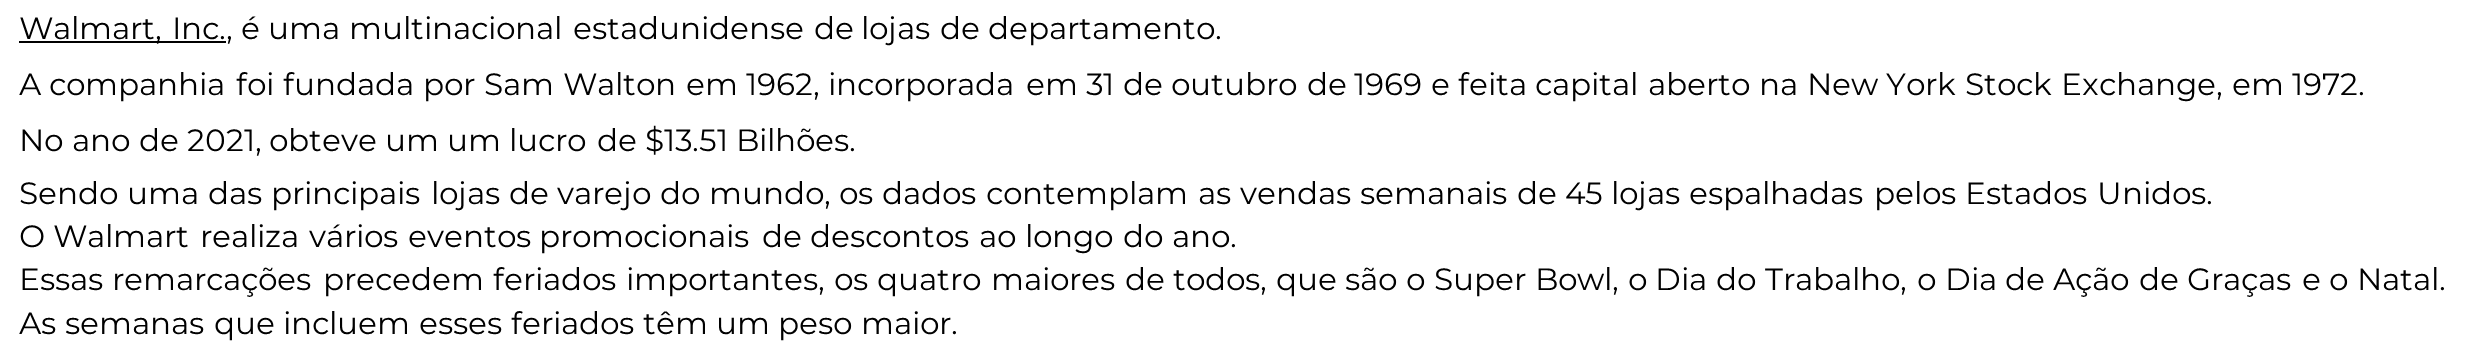

**OBJETIVO** 

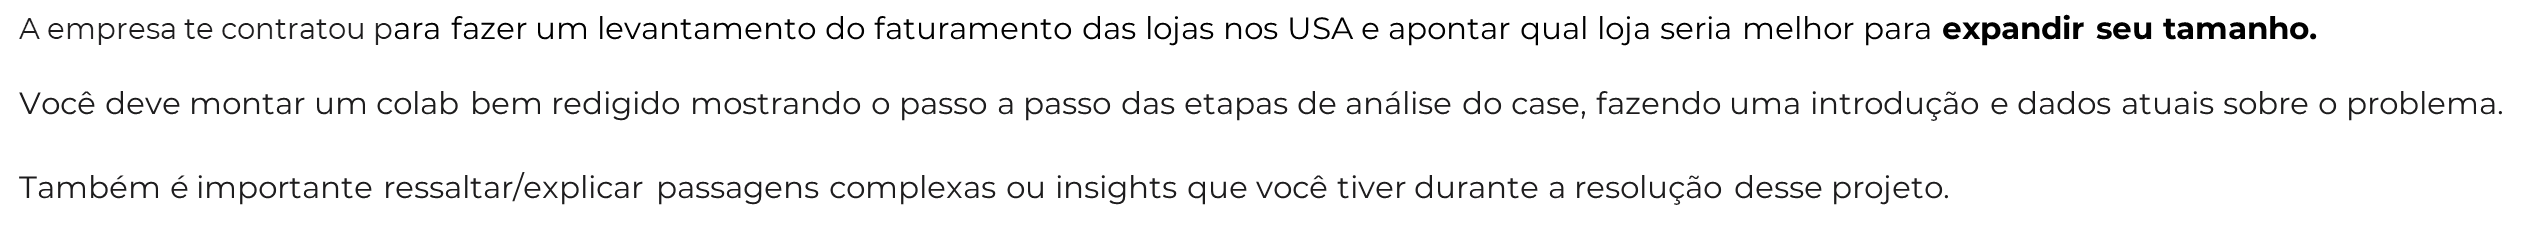

**DATASET**

Os datasets são bases de dados específicas que servem para analisar e prever alguma informação. Para este trabalho será utilizado o dataset disponível no link abaixo: https://www.kaggle.com/yasserh/walmart-dataset.


**IMPORTANDO BIBLIOTECAS**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import datetime


**ANÁLISE DE DADOS**


In [ ]:
walmart = pd.read_csv('Walmart.csv', sep = ',')
#Exibição das cinco primeiro linhas do dataset
walmart.rename(columns = {'Store': 'Loja', 'Date': 'Data','Weekly_Sales': 'Vendas', 'Holiday_Flag': 'Feriado',
 'Temperature': 'Temperatura', 'Fuel_Price': 'Combustivel','CPI': 'IPC',
 'Unemployment':'Desemprego'}, inplace = True)
walmart.head()

,Loja,Data,Vendas,Feriado,Temperatura,Combustivel,IPC,Desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#Quantidade de linhas e colunas do dataset
walmart.shape

(6435, 8)

In [ ]:
#Tipos dos dados armazenados no dataset
tipo_dados = pd.DataFrame(walmart.dtypes, columns = ['Tipo de Dados'])
tipo_dados.columns.name = 'Variáveis'
tipo_dados

Variáveis,Tipo de Dados
Loja,int64
Data,object
Vendas,float64
Feriado,int64
Temperatura,float64
Combustivel,float64
IPC,float64
Desemprego,float64


In [ ]:
walmart.isna()

,Loja,Data,Vendas,Feriado,Temperatura,Combustivel,IPC,Desemprego
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [ ]:
#sem valores nulos
walmart.isna().count()

Loja           6435
Data           6435
Vendas         6435
Feriado        6435
Temperatura    6435
Combustivel    6435
IPC            6435
Desemprego     6435
dtype: int64

In [ ]:
#valores não nulos
walmart.notna().count()

Loja           6435
Data           6435
Vendas         6435
Feriado        6435
Temperatura    6435
Combustivel    6435
IPC            6435
Desemprego     6435
dtype: int64

**ANÁLISE PRELIMINARES**


**ESTATÍSTICA DESCRITIVA**

In [ ]:
walmart.describe().round(2)

,Loja,Vendas,Feriado,Temperatura,Combustivel,IPC,Desemprego
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


**COEFICIENTE DE CORRELAÇÃO**

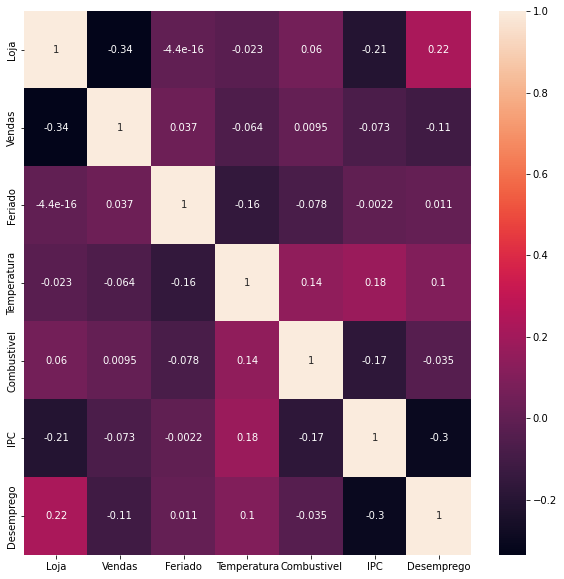

In [ ]:
ax = plt.subplots(figsize= (10,10))
sns.heatmap(walmart.corr(), annot = True)

**
|r| = 0 --> Correlação Nula
0 < |r| <= 0,30 --> Correlação Fraca
0,30 < |r| <= 0,70 --> Correlação Média
0,70 < |r| <= 0,90 --> Correlação Forte
0,90 < |r| <= 0,99 --> Correlação Fortíssima
|r| = 1 --> Correlação Perfeita
**

Inexistência de Correlação entre as variáveis.

**ANÁLISE GRÁFICA**

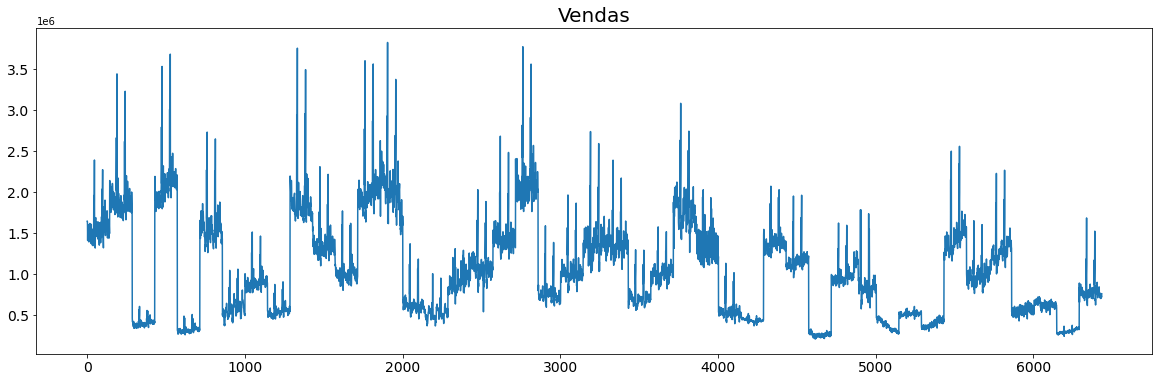

In [ ]:
fig, ax = plt.subplots(figsize = (20,6))
ax.set_title('Vendas', fontsize = 20)
ax=walmart['Vendas'].plot(fontsize=14)


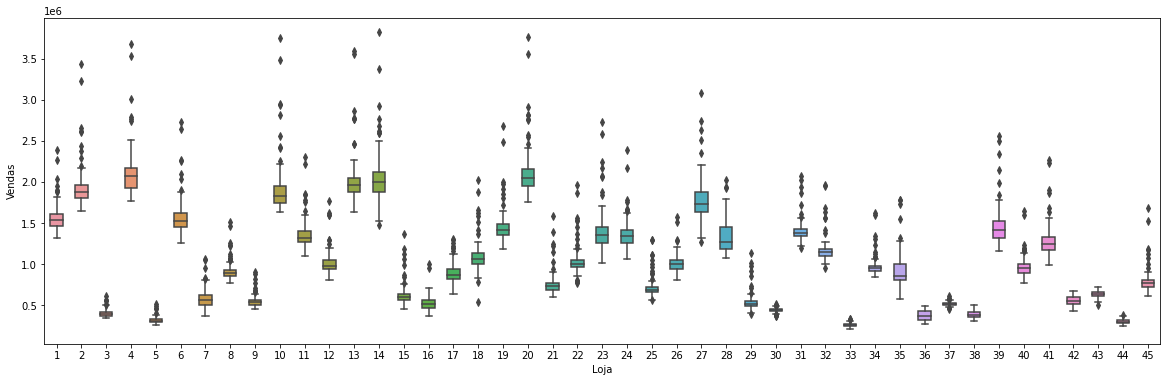

In [ ]:
ax = sns.boxplot(y= 'Vendas', x= 'Loja', data = walmart, orient = 'v', width = 0.5)
ax.figure.set_size_inches(20,6)

**IDENTIFICANDO E REMOVENDO OUTLIERS**


In [ ]:
lojas = walmart.groupby('Loja')['Vendas']
lojas.head()

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6292     890689.51
6293     656988.64
6294     841264.04
6295     741891.65
6296     777951.22
Name: Vendas, Length: 225, dtype: float64

In [ ]:
Q1 = lojas.quantile(.25)
Q3 = lojas.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [ ]:
walmart_filtrado = pd.DataFrame()
for loja in lojas.groups.keys():
 eh_loja = walmart['Loja'] == loja
 eh_dentro_limite = (walmart["Vendas"] >= limite_inferior[loja]) & (walmart['Vendas'] <= limite_superior[loja])
 selecao = eh_loja & eh_dentro_limite
 dados_selecao = walmart[selecao]
 walmart_filtrado = pd.concat([walmart_filtrado, dados_selecao])


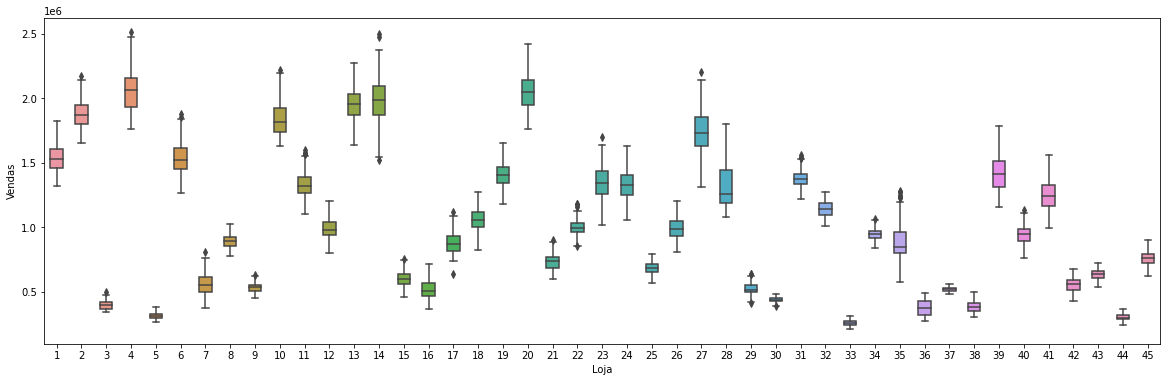

In [ ]:
ax = sns.boxplot(y= 'Vendas', x= 'Loja', data = walmart_filtrado, orient = 'v', width = 0.5)
ax.figure.set_size_inches(20,6)


In [ ]:
walmart_filtrado.describe().round(2)


,Loja,Vendas,Feriado,Temperatura,Combustivel,IPC,Desemprego
count,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00,6135.00
mean,23.10,1019223.05,0.06,61.52,3.37,171.49,8.00
std,13.03,534843.09,0.24,18.20,0.46,39.37,1.89
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,545080.82,0.00,48.74,2.92,131.59,6.89
50%,23.00,945143.33,0.00,63.78,3.48,182.61,7.87
75%,34.00,1398522.14,0.00,75.56,3.74,212.76,8.62
max,45.00,2508955.24,1.00,100.14,4.47,227.23,14.31


In [ ]:
walmart_filtrado.shape


(6135, 8)

##GRÁFICOS


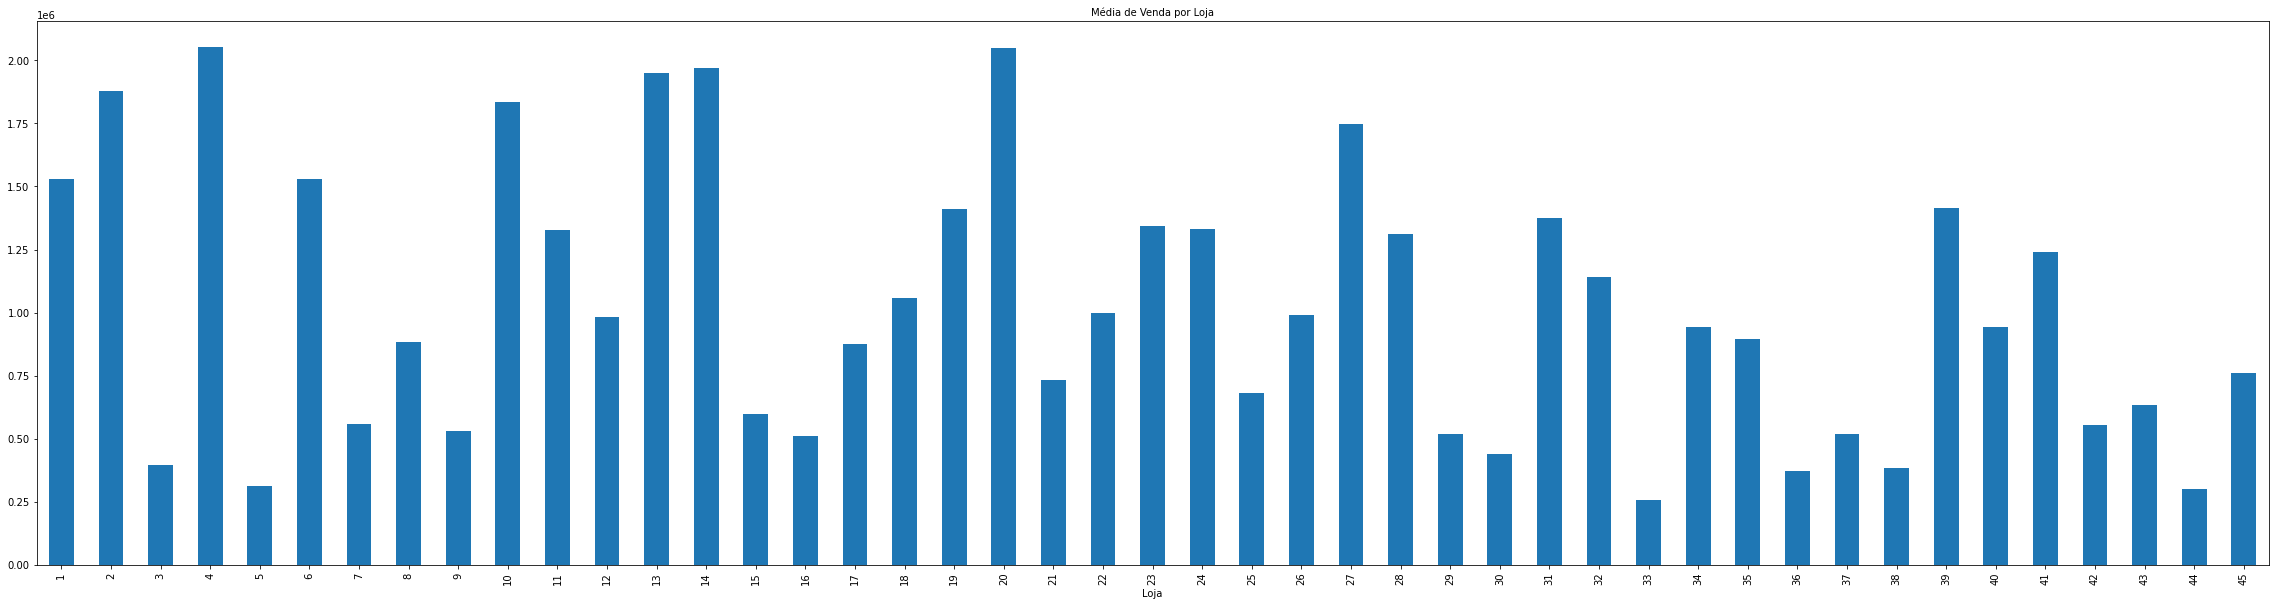

In [ ]:
Loja = walmart_filtrado.groupby('Loja')
fig= Loja['Vendas'].mean().plot.bar()
plt.rc('figure', figsize = (40,10))
fig.set_title('Média de Venda por Loja', {'fontsize':10});

In [ ]:
walmart_filtrado.groupby(['Loja'])['Vendas'].mean().round(2).sort_values(ascending = False). head(5)


Loja
4     2051352.01
20    2048491.53
14    1971226.61
13    1950209.06
2     1877173.64
Name: Vendas, dtype: float64

##CONCLUSÃO


1) Sem correlão entre as variáveis do dataset;
2) A minha análise foi pautada pela média de valores de vendas das lojas;
3) As melhores lojas são: 4,20,14,13 e 2.